# k_means clustring

In [6]:
import numpy as np
import pandas as pd
import random as rd 
import matplotlib.pyplot as plt
from math import sqrt

In [7]:
data=pd.read_csv("data.csv")
data

,A,B
0,11516,15
1,21651,15
2,2626,16
3,2,19
4,61,19
5,1,20
6,62,20
7,2566,21
8,32162,22
9,3262,28


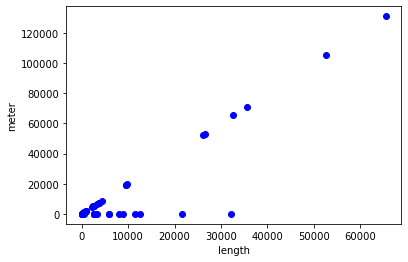

In [8]:
X=data[["A","B"]]
plt.scatter(X["A"],X["B"],c="blue")
plt.xlabel("length")
plt.ylabel("meter")
plt.show()



In [9]:
K=2
Centroids=(X.sample(n=K))
Centroids

,A,B
17,5815,61
29,32653,65306


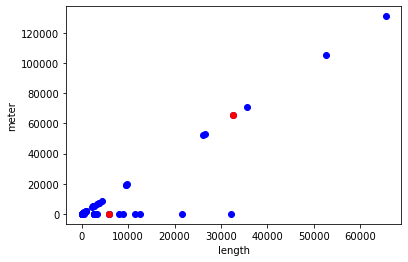

In [10]:
plt.scatter(X["A"],X["B"],c="blue")
plt.scatter(Centroids["A"],Centroids["B"],c="red")
plt.xlabel("length")
plt.ylabel("meter")
plt.show()

In [13]:
diff=1
j=0
while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["A"]-row_d["B"])**2
            d2=(row_c["B"]-row_d["B"])**2
            d=sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist=row[i+1]
                pos=i+1
        C.append(pos)
    X["Clust"]=C
    Centroids_new=X.groupby(["Clust"]).mean()[["B","A"]]
    if j== 0:
        diff= 1
        j=j+1
    else:
        diff=(Centroids_new['B']-Centroids['B']).sum()+(Centroids_new['A']-Centroids['A']).sum()
        print(diff.sum())
    Centroids=X.groupby(["Clust"]).mean()[["B","A"]]

0.0


In [14]:
Centroids

,B,A
Clust,,
1,2916.465116,4259.348837
2,79718.666667,39859.333333


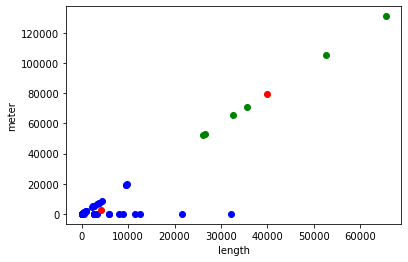

In [16]:
color=['blue','green','RED']
for k in range(K):
    data=X[X["Clust"]==k+1]
    plt.scatter(data["A"],data["B"],c=color[k])
plt.scatter(Centroids["A"],Centroids["B"],c='red')
plt.xlabel("length")
plt.ylabel("meter")
plt.show()
    